# Churned Customer Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested to understand the patterns from the customer base, so the client can learn the most relevant variables that are correlated to a churned customer.

## Inputs

* outputs/datasets/collection/TelcoCustomerChurn.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\kathr\\Nextcloud\\Dokumente\\Karriere\\Projekte\\vscode-projects\\PP5\\churnometer\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\kathr\\Nextcloud\\Dokumente\\Karriere\\Projekte\\vscode-projects\\PP5\\churnometer'

---

# Load Data

In [4]:
import pandas as pd
# drop cusotmerID because it is an identifier variable
df = (pd.read_csv("outputs/datasets/collection/TelcoCustomerChurn.csv")
    .drop(['customerID'], axis=1)
    )
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [7]:
from ydata_profiling import ProfileReport

# Convert object columns to categorical so that it can e displayed properly in the report
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
    
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe() # needs: pip install notebook ipython ipykernel ipywidgets

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

# Correlation Study

Due to the predominance of categorical variables ee will use one hot encoding on categorical variables and explore correlation levels between
churn and remaining variables. 

The effect of one hot encode is that each
categorical column is transformed into new columns using its levels, and it is assigned
a binary value of 0 or 1 to these columns.

This transformation helps the correlation analysis, since the correlation methods need
the variables to be numbers, and one hot encoding does that for us.

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='category'].to_list(), drop_last=False) # eigentlich df.dtypes=='object'
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(7043, 46)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_Yes,Partner_No,Dependents_No,...,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
0,0,1,29.85,29.85,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
1,0,34,56.95,1889.50,0,0,1,0,1,1,...,0,0,1,0,0,1,0,1,0,0
2,0,2,53.85,108.15,1,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0


In [9]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   int32  
 6   gender_Male                              7043 non-null   int32  
 7   Partner_Yes                              7043 non-null   int32  
 8   Partner_No                               7043 non-null   int32  
 9   Dependents_No                            7043 non-null   int32  
 10  Dependents_Yes                           7043 no

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [10]:
corr_spearman = df_ohe.corr(method='spearman')['Churn'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

Contract_Month-to-month           0.405103
tenure                           -0.367062
OnlineSecurity_No                 0.342637
TechSupport_No                    0.337281
InternetService_Fiber optic       0.308020
Contract_Two year                -0.302253
PaymentMethod_Electronic check    0.301919
OnlineBackup_No                   0.268005
DeviceProtection_No               0.252481
TotalCharges                     -0.232190
Name: Churn, dtype: float64

We do the same for `pearson`

In [11]:
corr_pearson = df_ohe.corr(method='pearson')['Churn'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

Contract_Month-to-month                 0.405103
tenure                                 -0.352229
OnlineSecurity_No                       0.342637
TechSupport_No                          0.337281
InternetService_Fiber optic             0.308020
Contract_Two year                      -0.302253
PaymentMethod_Electronic check          0.301919
OnlineBackup_No                         0.268005
DeviceProtection_No                     0.252481
DeviceProtection_No internet service   -0.227890
Name: Churn, dtype: float64

For both methods, we notice weak or moderate levels of correlation between Churn and a given variable. 
* Ideally, we pursue strong correlation levels. However, this is not always possible.

We will consider the top five correlation levels at `df_ohe` and will study the associated variables at `df`

In [ ]:
# takes the top 5 features from two correlation rankings (corr_pearson and corr_spearman) 
# and combines them into a unique set of feature names.
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'Contract_Month-to-month',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'TechSupport_No',
 'tenure'}

Therefore we are studying at df the following variables. We will investigate if:
* A churned customer typically has a month-to-month contract.
* A churned customer typically has fiber optic.
* A churned customer typically doesn't have tech support.
* A churned customer doesn't have online security.
* A churned customer typically has low tenure levels.

In [19]:
# Choose variables with OneHotEncoding for next analysis
vars_to_study = ['Contract', 'InternetService', 'OnlineSecurity', 'TechSupport', 'tenure']
vars_to_study

['Contract', 'InternetService', 'OnlineSecurity', 'TechSupport', 'tenure']

# EDA on selected variables

In [15]:
df_eda = df.filter(vars_to_study + ['Churn'])
df_eda.head(5)

,Contract,InternetService,OnlineSecurity,TechSupport,tenure,Churn
0,Month-to-month,DSL,No,No,1,0
1,One year,DSL,Yes,No,34,0
2,Month-to-month,DSL,Yes,No,2,1
3,One year,DSL,Yes,Yes,45,0
4,Month-to-month,Fiber optic,No,No,2,1


## Variables Distribution by Churn

We plot the distribution (numerical and categorical) coloured by Churn

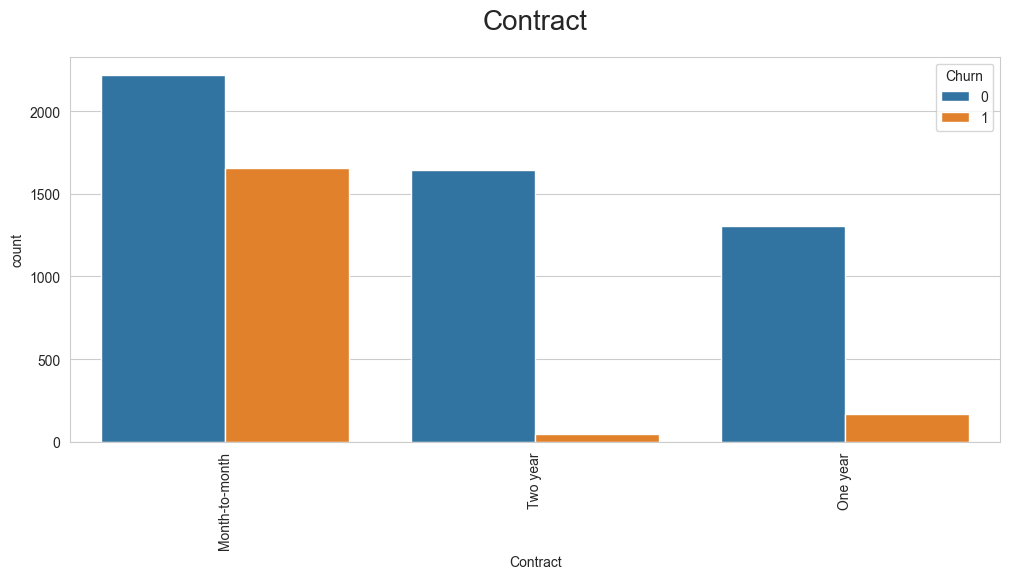

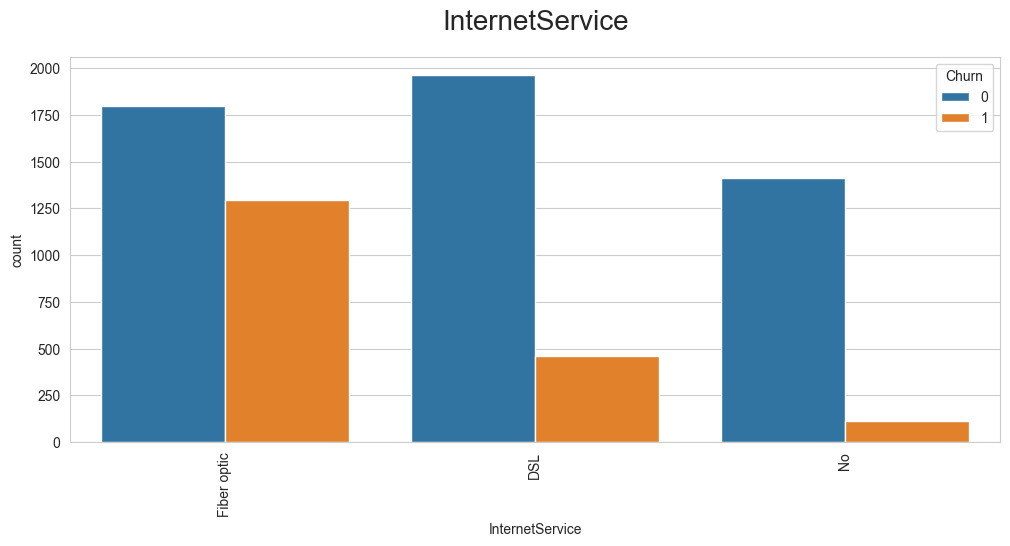

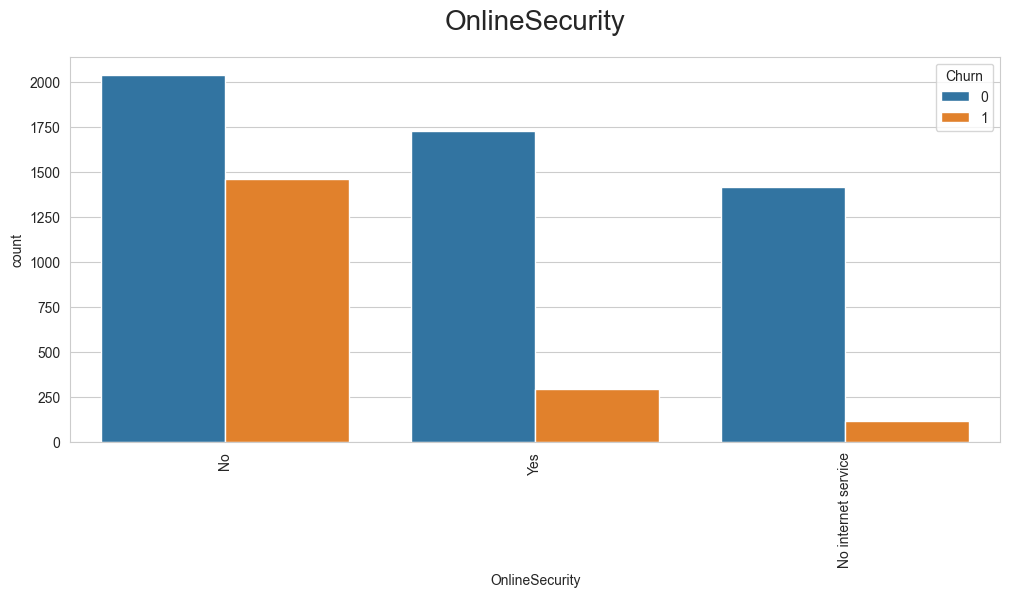

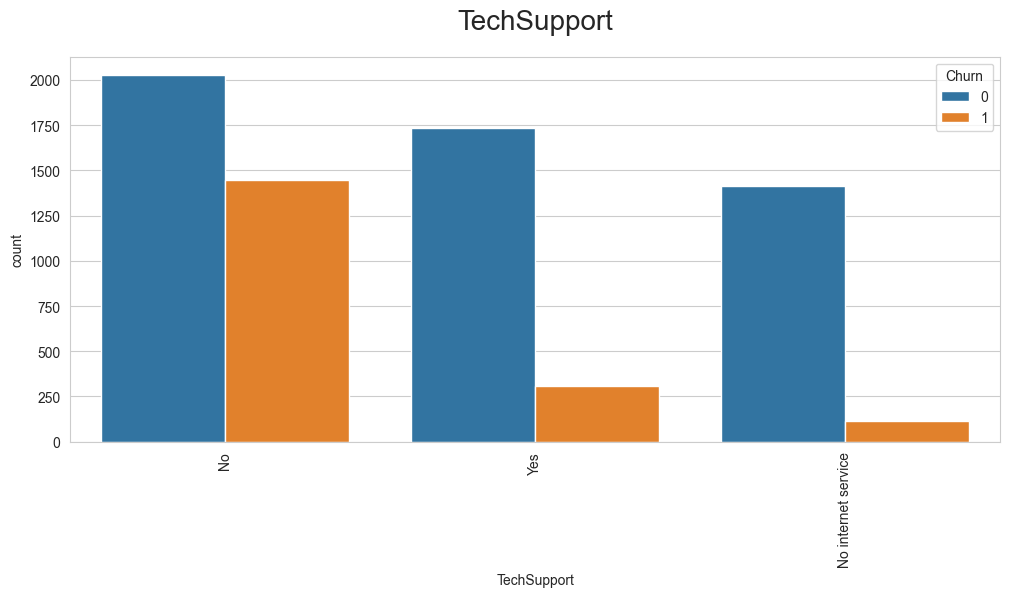

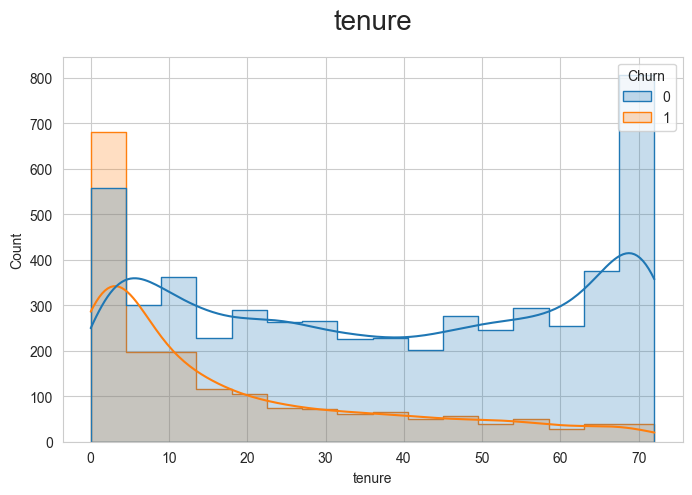

In [23]:
# for vs code
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


# countplot for cetegorical variables
def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

# histogram for categorical variables
def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'Churn'
for col in vars_to_study:
    if df_eda[col].dtype == 'category':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")


Churned people tend to have “month to month contract”,
fiber optic, no online security, no tech support, and low levels of tenure, meaning the person
doesn’t stay long as a customer.

At the same time, it doesn't mean all churned customers have all these patterns at the same time,
we just noticed a general trend.

---

## Parallel Plot

Create a separate DataFrame and transform `tenure` (numerical) into bins (categorical) for visualising at `parallel_categories()` plot. 

This type of plot needs categorical variables.


In [ ]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
# majority of churns happen until 24 months -> choose the bins according to that
tenure_map = [-np.Inf, 6, 12, 18, 24, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={'tenure': tenure_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()


,Contract,InternetService,OnlineSecurity,TechSupport,tenure,Churn
0,Month-to-month,DSL,No,No,0,0
1,One year,DSL,Yes,No,4,0
2,Month-to-month,DSL,Yes,No,0,1
3,One year,DSL,Yes,Yes,4,0
4,Month-to-month,Fiber optic,No,No,0,1


In [27]:
disc.binner_dict_['tenure']

[-inf, 6, 12, 18, 24, inf]

Create a map to replace the `tenure` variable with more informative levels.

In [33]:
n_classes = len(tenure_map) - 1
classes_ranges = disc.binner_dict_['tenure'][1:-1]

labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

labels_map




{0: '<6', 1: '6 to 12', 2: '12 to 18', 3: '18 to 24', 4: '+24'}

Replace using `.replace()`

In [34]:
df_parallel['tenure'] = df_parallel['tenure'].replace(labels_map)
df_parallel.head()

,Contract,InternetService,OnlineSecurity,TechSupport,tenure,Churn
0,Month-to-month,DSL,No,No,<6,0
1,One year,DSL,Yes,No,+24,0
2,Month-to-month,DSL,Yes,No,<6,1
3,One year,DSL,Yes,Yes,+24,0
4,Month-to-month,Fiber optic,No,No,<6,1


Creates multi-dimensional categorical data plot

In [35]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color="Churn")
fig.show(renderer='jupyterlab')

These are the same patterns from the previous section but now in a single plot.

---

# Conclusions and Next steps

The correlations and plots interpretation converge. 
* A churned customer typically has a month-to-month contract.
* A churned customer typically has fiber optic.
* A churned customer typically doesn't have tech support.
* A churned customer doesn't have online security.
* A churned customer typically has low tenure levels.

---

Well done! You generated code that answers business requirement 1 and can be used to build Streamlit App
* In this notebook, we are not pushing any file to the repo.
* Clear the cell's outputs before moving on!